In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 12

## Разделение данных по классам

In [3]:
imgfolder = 'input/train_images'
df = pd.read_csv('input/train.csv')
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [4]:
df['ClassId'] = df['ClassId'].astype(int)
df = df.pivot(index='ImageId', columns='ClassId', values='EncodedPixels')
df = df.reindex(columns=[1, 2, 3, 4])
df['defects'] = df.count(axis=1)
df

ClassId,1,2,3,4,defects
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
...,...,...,...,...,...
ffcf72ecf.jpg,NaN,NaN,121911 34 122167 101 122422 169 122678 203 122...,NaN,1
fff02e9c5.jpg,NaN,NaN,207523 3 207777 9 208030 15 208283 22 208537 2...,NaN,1
fffe98443.jpg,NaN,NaN,105929 5 106177 14 106424 24 106672 33 106923 ...,NaN,1


In [5]:
#расширение таблицы для включения записей об изображениях без дефектов
all_idx = os.listdir(imgfolder)
current_idx = df.index.tolist()
new_idx = list(set(all_idx)-set(current_idx))
new_df = pd.DataFrame(index=new_idx, columns=[1, 2, 3, 4])
new_df['defects'] = new_df.count(axis=1)
df = pd.concat([df, new_df], axis=0)
df

,1,2,3,4,defects
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
...,...,...,...,...,...
2cf9289c4.jpg,NaN,NaN,NaN,NaN,0
0285f63ad.jpg,NaN,NaN,NaN,NaN,0
1e5f88c2c.jpg,NaN,NaN,NaN,NaN,0
d47e33408.jpg,NaN,NaN,NaN,NaN,0


In [6]:
#подсчет статистик по дефектам
def stat(df):
    img_num = len(df)
    defects_num = sum(df['defects'] > 0)
    print('the number of images: {}'.format(img_num))
    print('with no defects: {}'.format(img_num - defects_num))
    print('with defects: {}\n'.format(defects_num))
    y = []
    for i in range(4):
        n = len(df[df[i+1].notna()])
        print('with {} defects class: {}'.format(i+1, n))
        y.append(n)

    fig, ax = plt.subplots()
    sns.barplot(x=[1,2,3,4], y=y, ax=ax)
    ax.set_title("the number of images for each class")
    ax.set_xlabel("class");

the number of images: 12568
with no defects: 5902
with defects: 6666

with 1 defects class: 897
with 2 defects class: 247
with 3 defects class: 5150
with 4 defects class: 801


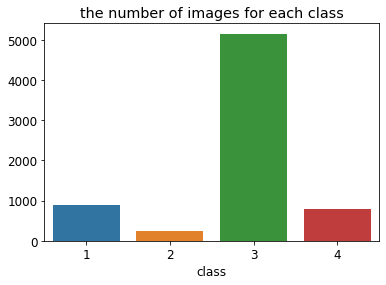

In [7]:
stat(df)

In [ ]:
print(5150/897, 51)

In [ ]:
df = df.sort_values(by=[2, 4, 1, 3])
df

In [7]:
#разделение на train, val и test
train = []
val = []
test = []
residual_df = df
for i in [2, 4, 1, 3, 'defects']:
    tmp_df = residual_df[residual_df[i].notna()]
    residual_df = residual_df[residual_df[i].isna()]
    tmp_train, tmp_val, tmp_test = np.split(tmp_df.sample(frac=1), [int(.6*len(tmp_df)), int(.8*len(tmp_df))])
    train.append(tmp_train)
    val.append(tmp_val)
    test.append(tmp_test)

In [13]:
def save_df(arr, name):
    df = pd.concat(arr, axis=0)
    df['img'] = df.index
    stat(df)
    df.to_csv('input/{}.csv'.format(name), index=False)
    df.head()

the number of images: 7540
with no defects: 3541
with defects: 3999

with 1 defects class: 532
with 2 defects class: 148
with 3 defects class: 3089
with 4 defects class: 481


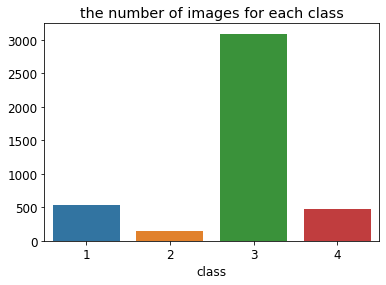

In [14]:
save_df(train, 'train_df')

the number of images: 2513
with no defects: 1180
with defects: 1333

with 1 defects class: 184
with 2 defects class: 49
with 3 defects class: 1022
with 4 defects class: 160


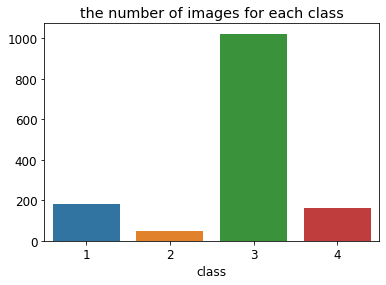

In [15]:
save_df(val, 'val_df')

the number of images: 2515
with no defects: 1181
with defects: 1334

with 1 defects class: 181
with 2 defects class: 50
with 3 defects class: 1039
with 4 defects class: 160


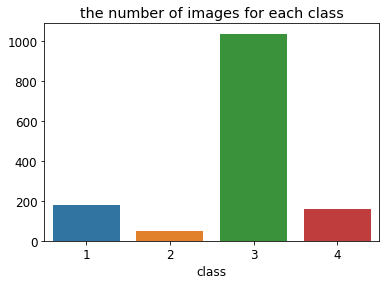

In [16]:
save_df(test, 'test_df')

In [19]:
df = pd.read_csv('input/train_df.csv', index_col='img')
df.head()

,1,2,3,4,defects
img,,,,,
6fdf2d1be.jpg,NaN,233985 46 234241 136 234497 181 234753 181 235...,13107 8 13363 24 13619 76 13875 77 14131 79 14...,NaN,2
f618df512.jpg,361285 4 361541 11 361796 18 362052 25 362308 ...,392397 52 392602 102 392858 102 393114 101 393...,NaN,NaN,2
b963c168c.jpg,NaN,106368 15 106624 45 106880 75 107136 105 10739...,NaN,NaN,1
8b6c404ac.jpg,NaN,118105 89 118273 177 118529 176 118785 176 119...,NaN,NaN,1
2a7f8bab0.jpg,NaN,114376 16 114602 46 114827 78 115052 109 11527...,NaN,NaN,1
